Task:
As a data analyst, your task is to prepare and analyse the data set using appropriate data preparation and statistical techniques and ultimately apply the machine learning models for the specified tasks. Your analysis should aim to identify any relationships or trends in the data that can be used to improve employee satisfaction, productivity and issues. Recognise suitable independent variables and target variable from the dataset to justify your classification/ prediction tasks. You can perform clustering on the dataset based on your analysis if applicable. You can generate synthetic data or use any additional data to support your machine learning models if required.


Data Preparation
● Characterisation of the data set: size; number of attributes; has/does not have missing values, number of observations etc.[0-10]
● Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA (Exploratory Data Analysis) visualizations (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.[0-20]
● Apply encoding, scaling and feature engineering as and if required, detailing how and why you used these techniques and the rationale for your decisions.[0-30]
● Explore the possibility of using dimensional reduction on the dataset. Employ both LDA (Linear Discriminant Analysis) and PCA (Principal Component Analysis) and compare the separation of
classes through visualization. Explain the difference between both techniques in your own words and discuss in detail how your results may affect your analysis of classifying or clustering the normal as compared to anomalous biddings.[0-40]


Machine Learning
● Provide a conceptual understanding and logical justification based on the reasoning for the specific choice of machine learning approaches (supervised/ Unsupervised) for the provided data set. (0-20 marks)
● Machine Learning models can be used for Prediction, Classification, and Clustering. You can choose suitable features for the machine learning models based on feature selection methods, such as random forest or any other method. The selection of hyperparameters for the ML models should be performed by using hyperparameter tuning, such as GridSearchCV. Obtain best accuracy using optimal values of the hyperparameters.. (0-30 marks)
● You should train and test the Machine learning models in the case of supervised learning for different splits (at least 2 different splits) and use appropriate metrics for unsupervised learning. Use K-fold cross-validation to provide authenticity of the modelling outcomes. (0-30 marks)
● Exhibit a comparison of ML modelling outcomes using a Table or graph visualisation. Identify the possible similarities and contrast of the Machine Learning modelling outcomes based on chosen metric and discuss their statistical understanding. (0-20 marks)


Report
A report is required to provide the details of work performed in all tasks. The report should be based on Introduction, rationale of data preparation techniques, machines learning models and conclusions. Illustrations should be used to highlight the details of any section.
This should also include evidence to support your data wrangling and analysis through the use of references and citations.
Conclusions, Findings of data set and references/citations in (HARVARD style). This should be completed in the Jupyter Notebook Markdown.

# Libraries 

In [1]:
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

License
This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.

This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

DOI
10.24432/C5BS66

Creators
NA NA
National Center for Health Statistics (NCHS) at the Centers for Disease Control and Prevention (CDC)

https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset

# Same text as ca1

# EDA

Exploratory Data Analysis. 

After importing the necessary libraries the next step is to do the Exploratory Data Analysis in our raw data to check its characteristics, such as: the size, shape, which kind of features and observations they are, if there are any missing or duplicated values and what kind of distribution it is. EDA was originally developed in 1970 by the American mathematician John Tukey (IBM, 2023). 

This is a crucial task because it is the one that helps us to understand what we are dealing with and which approach we are going to use next to obtain a good accuracy for the Machine Learning Model applied and get effective results. 



In [2]:
age = pd.read_csv("NHANES_age_prediction.csv")

In [3]:
age.tail(2)

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99
2277,83727.0,Adult,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76


In [4]:
age.shape

(2278, 10)

In [5]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [6]:
age.duplicated().sum()

0

In [7]:
age.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [8]:
age.drop(columns = "SEQN", inplace = True)

In [9]:
age["age_group"].unique()

array(['Adult', 'Senior'], dtype=object)

In [10]:
age["age_group"].value_counts()

age_group
Adult     1914
Senior     364
Name: count, dtype: int64

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age_group', ylabel='Count'>

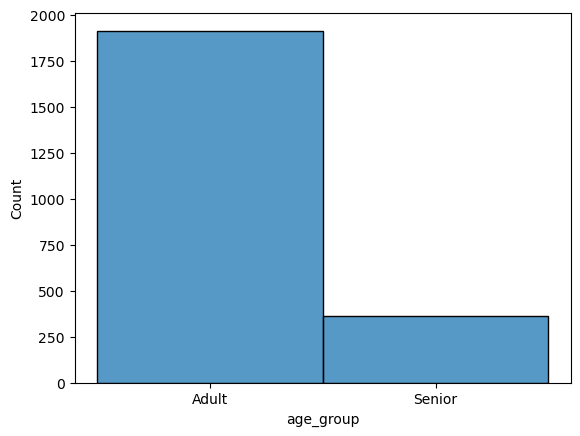

In [11]:
sns.histplot(data = age, x = "age_group")

# Same text as ca1

By plotting this graphic of the target variable "class" we can see that the amount of failures for components not related to the APS system is significantly superior to the ones related to the APS. The difference between the two classes are so strong that it may be necessary to balance the dataset so the accuracy can be more trustworthy. A higher accuracy in this case might be misleading given the bias. The imbalance of the dataset can cause an overfitting in the Machine Learning Model when the minority class tends to be ignored over the majority (Truong, 2022). 

The application of SMOTE (Synthetic Minority Oversampling Technique), where the dataset is balanced by the creation of synthetic samples of the minority class (SATPATHY) can be a solution for this problem or undersampling techniques such as Near-miss that eliminate the majority class observations by random in order to balance the dataset (Imarticus, 2021).


# SAME TEXT AS CA1

"Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories)." (Brownlee, 2020). That is the reason why the variable "class" will be transformed in a numerical data through the One-Hot Enconding where a binary value will be put in place and no ordinal relationship will be forced. This method create two new features where "class_neg" will be 1 when the "neg" value is true and 0 when is false and "class_pos" will be the oposite. The new variable "class_pos" will be dropped so we have just one target variable and the Machine Learning models can perform their mathematical procedures. 

In [12]:
age = pd.get_dummies(age, dtype = int)

In [13]:
age.tail(2)

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Adult,age_group_Senior
2276,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,1,0
2277,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76,1,0


In [14]:
age.drop(columns = "age_group_Senior", inplace = True)

### There are more 0 in the "age_group_Senior" column 
justigy why this is better

In [15]:
age.tail(2)

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Adult
2276,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,1
2277,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76,1


for column in age.columns:
    plt.figure(figsize = (4, 2))
    plt.hist(age[column])
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

for column in age.columns:
    plt.figure(figsize = (4, 2))
    plt.boxplot(age[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

The distribution of the columns are not normal as we can see in the graphics 

# Correlation

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = age.columns
vif_data["VIF"] = [variance_inflation_factor(age.values, i) for i in range(age.shape[1])]
print(vif_data)

          Variable        VIF
0         RIDAGEYR  11.209553
1         RIAGENDR  10.367954
2           PAQ605  20.416338
3           BMXBMI  24.915629
4           LBXGLU  54.956103
5           DIQ010  55.210887
6           LBXGLT  14.247082
7            LBXIN   3.951943
8  age_group_Adult  11.327506


corr_matrix = np.corrcoef(age, rowvar = False)

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', 
            xticklabels = range(age.shape[1]), yticklabels = range(age.shape[1]))
plt.title("Feature Correlation Matrix")
plt.show()

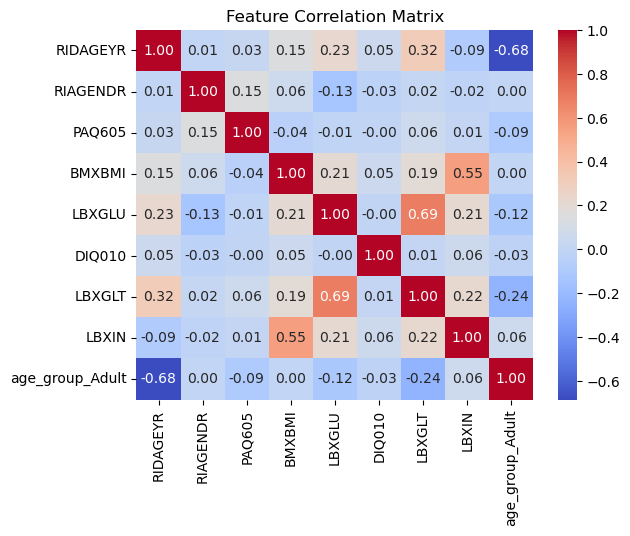

In [17]:
corr_matrix = age.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            xticklabels=age.columns, yticklabels=age.columns)

plt.title("Feature Correlation Matrix")
plt.show()

In [18]:
eigenvalues, _ = np.linalg.eig(corr_matrix)
print("Eigenvalues:", eigenvalues)

Eigenvalues: [2.28735158 1.6442327  0.25546501 0.28328876 0.46698967 1.18954507
 1.07942265 0.96177846 0.83192609]


In [19]:
condition_number = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))
print("Condition Number:", condition_number)

Condition Number: 2.992269808680624


In [20]:
def find_highly_correlated_vars(corr_matrix, threshold = 0.5):
    if isinstance(corr_matrix, pd.DataFrame):
        corr_matrix = corr_matrix.values
    rows, cols = np.where(np.abs(corr_matrix) > threshold)
    unique_pairs = set((min(r, c), max(r, c)) for r, c in zip(rows, cols) if r != c)
    return list(unique_pairs)

corr_matrix = age.corr()
highly_corr_vars = find_highly_correlated_vars(corr_matrix, threshold=0.5)

print("Pairs of highly correlated variables:", highly_corr_vars)

Pairs of highly correlated variables: [(3, 7), (0, 8), (4, 6)]


In [21]:
age.tail()

,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group_Adult
2273,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53,1
2274,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02,1
2275,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41,1
2276,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99,1
2277,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76,1


In [22]:
age_array = age.values

In [23]:
X = age_array[:, 0:8]

y = age_array[:, 8]

In [24]:
y

array([1., 1., 1., ..., 1., 1., 1.])

In [25]:
X.shape

(2278, 8)

In [26]:
X_with_constant = sm.add_constant(X)

model = sm.OLS(y, X_with_constant).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     278.5
Date:                Sun, 24 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:50:17   Log-Likelihood:                -166.09
No. Observations:                2278   AIC:                             350.2
Df Residuals:                    2269   BIC:                             401.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1410      0.078     14.679      0.0

## Normalisation

The MinMax method was chosen given the skeweness of the data. 

In [27]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

In [28]:
X_scaled

array([[0.72058824, 1.        , 0.16666667, ..., 0.5       , 0.19503546,
        0.14459129],
       [0.20588235, 1.        , 0.16666667, ..., 0.5       , 0.07092199,
        0.03631914],
       [0.05882353, 0.        , 0.16666667, ..., 0.5       , 0.04964539,
        0.05873715],
       ...,
       [0.32352941, 0.        , 0.16666667, ..., 0.5       , 0.14893617,
        0.2082232 ],
       [0.70588235, 1.        , 0.16666667, ..., 0.5       , 0.12056738,
        0.0474792 ],
       [0.20588235, 0.        , 0.16666667, ..., 0.5       , 0.12056738,
        0.03543808]])

# PCA

In [29]:
pca = PCA()

pca.fit(X_scaled)

PCA()

In [30]:
variance = pca.explained_variance_ratio_

var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 3)*100)

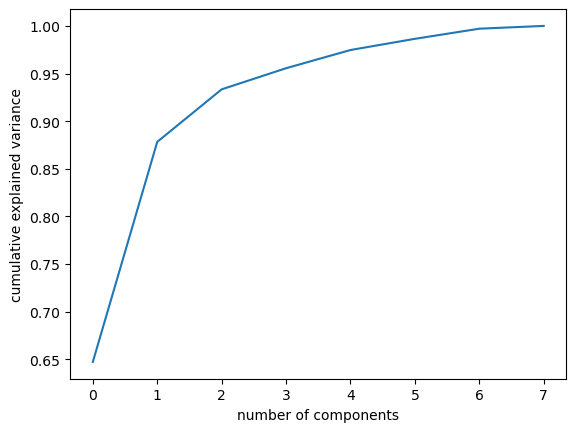

In [31]:
pca = PCA().fit(X_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

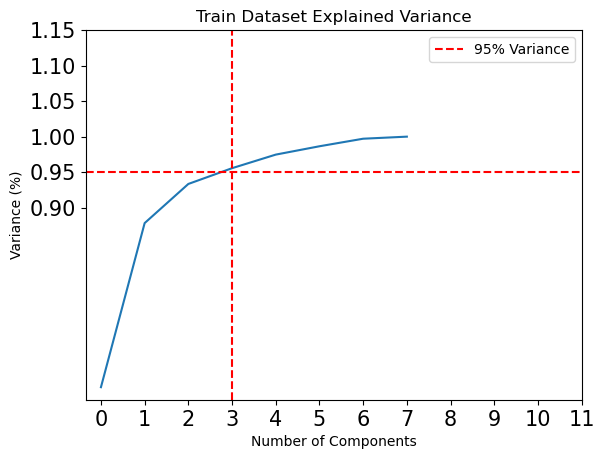

In [32]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.xticks(np.arange(0, 12, 1), fontsize = 15)
plt.ylabel("Variance (%)")
plt.yticks(np.arange(0.90, 1.2, 0.05), fontsize = 15)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
index_95 = np.argmax(cumulative_variance >= 0.95)
plt.axvline(x=index_95, color='r', linestyle='--')
plt.legend()
plt.title("Train Dataset Explained Variance")
plt.show()

## Split with 20%

In [33]:
X_train, X_test, y_tr, y_te = train_test_split(X_scaled, y, test_size = 0.3, random_state = 12)

In [34]:
X_scaled.shape, y.shape, X_train.shape, X_test.shape, y_tr.shape, y_te.shape

((2278, 8), (2278,), (1594, 8), (684, 8), (1594,), (684,))

# APPLYING PCA

In [35]:
pca = PCA(n_components = 3)

X_train_p = pca.fit_transform(X_train)

X_test_p = pca.transform(X_test)

In [36]:
from imblearn.under_sampling import NearMiss

nr = NearMiss()

# Train the model
X_train_pca, y_train = nr.fit_resample(X_train_p, y_tr)

X_test_pca, y_test = nr.fit_resample(X_test_p, y_te)

In [37]:
X_train_pca

array([[ 0.50729139,  0.45415379, -0.07306538],
       [-0.49300153,  0.34029935,  0.07389526],
       [ 0.5094277 ,  0.55237087, -0.01091817],
       ...,
       [-0.49388283,  0.2690405 ,  0.4671892 ],
       [ 0.5119406 ,  0.13395624, -0.12629468],
       [-0.49163253,  0.14311958, -0.01444295]])

In [38]:
X_test_pca

array([[ 0.50981764,  0.43852959,  0.06070771],
       [ 0.50797609,  0.33759696, -0.13735497],
       [ 0.51350949,  0.37837107,  0.07590466],
       [-0.49392118,  0.55918391, -0.02945452],
       [-0.49190142,  0.34756744, -0.14305843],
       [-0.49277665,  0.46359811, -0.0322854 ],
       [ 0.50655813,  0.49240754, -0.04690477],
       [-0.49345559,  0.54648526, -0.1030664 ],
       [-0.49347181,  0.54704115, -0.05683033],
       [ 0.50743208,  0.32805909, -0.15010848],
       [-0.49228372,  0.39523118, -0.16054952],
       [-0.49370967,  0.56021068,  0.07231582],
       [-0.49400793,  0.5657916 , -0.01037223],
       [ 0.50755941,  0.37317731, -0.04883844],
       [-0.4934522 ,  0.46073227, -0.04285765],
       [-0.49221546,  0.56510832,  0.06385969],
       [-0.49248773,  0.35683773, -0.10123645],
       [-0.49223429,  0.53845614, -0.17008033],
       [-0.49153539,  0.59172189,  0.02810139],
       [ 0.50818352,  0.45412852,  0.12647555],
       [ 0.50742734,  0.57773169,  0.037

In [39]:
X_train_pca.shape, X_test_pca.shape

((526, 3), (202, 3))

# Models

# Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
linear_reg = LinearRegression()

linear_reg.fit(X_train_pca, y_train)

yp_lr = linear_reg.predict(X_test_pca)

mse = mean_squared_error(y_test, yp_lr)
mse_r = mean_squared_error(y_test, yp_lr, squared = False)
r2 = r2_score(y_test, yp_lr)

n = len(y_test)
k = X_train_pca.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.06736739719404918
Root Mean Squared Error: 0.25955230146166913
R-squared: 0.7305304112238034
Adjusted R-squared: 0.7264475386665883


In [42]:
train_pred = linear_reg.predict(X_train_pca)
test_pred = linear_reg.predict(X_test_pca)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

Training MSE: 0.06978876478746747
Validation MSE: 0.06736739719404918


In [43]:
import tensorflow as tf
def huber_loss(y_test, yp_lr, delta=1.0):
    error = y_test - yp_lr
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_lr, delta=1.0)

mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Mean Huber Loss: 0.03368369859702459


In [44]:
score_l = cross_val_score(LinearRegression(), X_test_pca, y_test, cv = 5, scoring = 'r2').mean()
score_l

0.1026245078442155

In [45]:
pred = pd.DataFrame({'Actual': y_test, 'Predicted': yp_lr})
pred.head()

,Actual,Predicted
0,0.0,0.248344
1,0.0,0.526644
2,0.0,0.451367
3,0.0,-0.209936
4,0.0,0.457480


## Polynomial 2 and 3

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
poly_features = PolynomialFeatures(degree = 2)

X_train_poly = poly_features.fit_transform(X_train_pca)
X_test_poly = poly_features.transform(X_test_pca)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

yp_p2 = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, yp_p2)
mse_r = mean_squared_error(y_test, yp_p2, squared = False)
r2 = r2_score(y_test, yp_p2)

n = len(y_test)
k = X_train_pca.shape[1]  # Number of features
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.06102239767456707
Root Mean Squared Error: 0.24702711930993945
R-squared: 0.7559104093017317
Adjusted R-squared: 0.7522120821699397


In [48]:
score_lp2 = cross_val_score(poly_reg, X_test_pca, y_test, cv = 5, scoring = 'r2').mean()
score_lp2

0.1026245078442155

In [49]:
pred_p2 = pd.DataFrame({'Actual': y_test, 'Predicted': yp_p2})
pred_p2.head()

,Actual,Predicted
0,0.0,0.171219
1,0.0,0.433251
2,0.0,0.356900
3,0.0,-0.117945
4,0.0,0.371995


In [50]:
degree = 3
poly_features = PolynomialFeatures(degree=degree)

X_train_poly = poly_features.fit_transform(X_train_pca)
X_test_poly = poly_features.transform(X_test_pca)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

yp_p3 = poly_reg.predict(X_test_poly)

mse = mean_squared_error(y_test, yp_p3)
r2 = r2_score(y_test, yp_p3)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.03721114558457538
R-squared: 0.8511554176616984


## Ridge

In [51]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)  # Adjust alpha based on the strength of regularization
ridge_reg.fit(X_train_pca, y_train)

yp_lnR = ridge_reg.predict(X_test_pca)

mse = mean_squared_error(y_test, yp_lnR)
r2 = r2_score(y_test, yp_lnR)

print(f'Mean Squared Error (Ridge): {mse}')
print(f'R-squared (Ridge): {r2}')

Mean Squared Error (Ridge): 0.06860302954477289
R-squared (Ridge): 0.7255878818209085


In [52]:
pred_lnR = pd.DataFrame({'Actual': y_test, 'Predicted': yp_lnR})
pred_lnR.head()

,Actual,Predicted
0,0.0,0.275817
1,0.0,0.523006
2,0.0,0.457845
3,0.0,-0.136467
4,0.0,0.460182


In [53]:
degree = 2

poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)

ridge_reg2 = Ridge(alpha = 10.0) 
ridge_reg2.fit(X_train_poly, y_train)

yp_rp2 = ridge_reg2.predict(X_test_poly)

mse_ridge = mean_squared_error(y_test, yp_rp2)
mse_ridge_r = mean_squared_error(y_test, yp_rp2, squared = False)
r2_ridge = r2_score(y_test, yp_rp2)

n = len(y_test)
k = X_train_pca.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error (Ridge): {mse_ridge}')
print(f'Root Mean Squared Error: {mse_ridge_r}')
print(f'R-squared (Ridge): {r2_ridge}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error (Ridge): 0.1019953689032047
Root Mean Squared Error: 0.31936713810785966
R-squared (Ridge): 0.5920185243871812
Adjusted R-squared: 0.7214301224545586


In [54]:
score_rp2 = cross_val_score(ridge_reg2, X_test_pca, y_test, cv = 5, scoring = 'r2').mean()
score_rp2

0.03240044930125818

In [55]:
train_pred = ridge_reg2.predict(X_train_poly)
test_pred = ridge_reg2.predict(X_test_poly)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_rp2, delta = 1.0):
    error = y_test - yp_rp2
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 0.10575450276466063
Validation MSE: 0.1019953689032047
Mean Huber Loss: 0.03368369859702459


## Lasso

In [56]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1.0) 
lasso_reg.fit(X_train_pca, y_train)

yp_lnL = lasso_reg.predict(X_test_pca)

mse = mean_squared_error(y_test, yp_lnL)
r2 = r2_score(y_test, yp_lnL)

print(f'Mean Squared Error (Lasso): {mse}')
print(f'R-squared (Lasso): {r2}')

Mean Squared Error (Lasso): 0.25
R-squared (Lasso): 0.0


In [57]:
degree = 2

poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)
 
lasso_reg = Lasso(alpha = 10.0, max_iter = 100000)
lasso_reg.fit(X_train_poly, y_train)

yp_lp2 = lasso_reg.predict(X_test_poly)

mse_lasso = mean_squared_error(y_test, yp_lp2)
r2_lasso = r2_score(y_test, yp_lp2)

print(f'Mean Squared Error (Lasso): {mse_lasso}')
print(f'R-squared (Lasso): {r2_lasso}')

Mean Squared Error (Lasso): 0.25
R-squared (Lasso): 0.0


# Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state = 12), param_grid, cv = 5, scoring = 'r2')
grid_search.fit(X_train_pca, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred_best)
mse_r = mean_squared_error(y_test, y_pred_best, squared = False)
r2_best = r2_score(y_test, y_pred_best)

n = len(y_test)
k = X_train_pca.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared (Best Model): {r2_best}')
print(f'Adjusted R-squared: {adj_r2}')

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 100}
Mean Squared Error: 0.01327637985630603
Root Mean Squared Error: 0.11522317412875775
R-squared (Best Model): 0.9468944805747759
Adjusted R-squared: -0.015151515151515138


In [60]:
score_rf = cross_val_score(RandomForestRegressor(max_depth = None,
                                              min_samples_leaf = 1, 
                                              n_estimators = 50,
                                              random_state = 12), X_test_pca, y_test, 
                           cv = 10, scoring = 'r2').mean()
score_rf

0.17498947368421053

In [61]:
pred_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_best})
pred_rf.head(3)

,Actual,Predicted
0,0.0,0.000000
1,0.0,0.009278
2,0.0,0.069254


In [62]:
train_pred = best_model.predict(X_train_pca)
test_pred = best_model.predict(X_test_pca)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tfx
def huber_loss(y_test, y_pred_best, delta = 1.0):
    error = y_test - y_pred_best
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, y_pred_best, delta = 1.0)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 0.0054799016819319524
Validation MSE: 0.01327637985630603
Mean Huber Loss: 0.006638189928153015


# ANN

In [63]:
#!pip install tensorflow
# !pip install keras


In [64]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [65]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(units=64, activation='relu', input_dim=X_train_pca.shape[1]))

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

#from keras.layers import Dropout
#model.add(Dropout(0.5)) 

#from keras.regularizers import l1, l2
#model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True)
model.fit(X_train_pca, y_train, epochs = 300, batch_size = 64, validation_split=0.2, callbacks=[early_stopping])

y_pred = model.predict(X_test_pca)

mse = mean_squared_error(y_test, y_pred)
mse_r = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)

n = len(y_test)
k = X_train_pca.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))



Epoch 1/300
7/7 [==============================] - 0s 10ms/step - loss: 0.3512 - val_loss: 0.8560
Epoch 2/300
7/7 [==============================] - 0s 2ms/step - loss: 0.3073 - val_loss: 0.7320
Epoch 3/300
7/7 [==============================] - 0s 2ms/step - loss: 0.2745 - val_loss: 0.6125
Epoch 4/300
7/7 [==============================] - 0s 2ms/step - loss: 0.2524 - val_loss: 0.5020
Epoch 5/300
7/7 [==============================] - 0s 3ms/step - loss: 0.2395 - val_loss: 0.4139
Epoch 6/300
7/7 [==============================] - 0s 2ms/step - loss: 0.2305 - val_loss: 0.3716
Epoch 7/300
7/7 [==============================] - 0s 2ms/step - loss: 0.2191 - val_loss: 0.3543
Epoch 8/300
7/7 [==============================] - 0s 3ms/step - loss: 0.2066 - val_loss: 0.3224
Epoch 9/300
7/7 [==============================] - 0s 2ms/step - loss: 0.1926 - val_loss: 0.2964
Epoch 10/300
7/7 [==============================] - 0s 2ms/step - loss: 0.1781 - val_loss: 0.2451
Epoch 11/300
7/7 [==========

In [66]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.053883992802052395
Root Mean Squared Error: 0.23212925882372604
R-squared: 0.7844640287917904
Adjusted R-squared: 0.7811983322583327


In [67]:
train_pred = model.predict(X_train_pca)
test_pred = model.predict(X_test_pca)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, y_pred, delta = 1.0):
    error = y_test - y_pred
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, y_pred, delta = 1.0)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

7/7 [==============================] - 0s 467us/step
Training MSE: 0.05806716877375161
Validation MSE: 0.053883992802052395
Mean Huber Loss: 0.21376258770687862


# SVM

In [68]:
from sklearn import svm

In [69]:
regressor = svm.SVR(kernel = 'linear', C = 5.0, epsilon = 2.5)

regressor.fit(X_train_pca, y_train)

yp_svm = regressor.predict(X_test_pca)

mse = mean_squared_error(y_test, yp_svm)
mse_r = mean_squared_error(y_test, yp_svm, squared = False)
r2 = r2_score(y_test, yp_svm)

n = len(y_test)
k = X_train_pca.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.25
Root Mean Squared Error: 0.5
R-squared: 0.0
Adjusted R-squared: -0.015151515151515138


In [70]:
score_svm = cross_val_score(svm.SVR(kernel = 'linear', C = 5.0, epsilon = 2.5), 
                            X_test_pca, y_test, cv = 10, scoring = 'r2').mean()
score_svm

-0.42631578947368426

In [71]:
pred_svm = pd.DataFrame({'Actual': y_test, 'Predicted': yp_svm})
pred_svm.head()

,Actual,Predicted
0,0.0,0.5
1,0.0,0.5
2,0.0,0.5
3,0.0,0.5
4,0.0,0.5


In [72]:
regressor = svm.SVR(kernel = 'poly', C = 50.0, epsilon = 3.5, degree = 2)

regressor.fit(X_train_pca, y_train)

yp_svm_p2 = regressor.predict(X_test_pca)

mse = mean_squared_error(y_test, yp_svm_p2)
mse_r = mean_squared_error(y_test, yp_svm_p2, squared = False)
r2 = r2_score(y_test, yp_svm_p2)

n = len(y_test)
k = X_train_pca.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.25
Root Mean Squared Error: 0.5
R-squared: 0.0
Adjusted R-squared: -0.015151515151515138


In [73]:
score_svr = cross_val_score(svm.SVR(kernel = 'poly', C = 50.0, epsilon = 3.5, degree = 2), 
                            X_test_pca, y_test, cv = 10, scoring = 'r2').mean()
score_svr

-0.42631578947368426

In [74]:
train_pred = regressor.predict(X_train_pca)
test_pred = regressor.predict(X_test_pca)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_svm_p2, delta = 1.0):
    error = y_test - yp_svm_p2
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_svm_p2, delta = 1.0)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 0.25
Validation MSE: 0.25
Mean Huber Loss: 0.125


In [75]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.1, 1, 10, 100],
              'epsilon': [0.1, 0.5, 1, 2],
              'degree': [2, 3, 4]}

random_search = RandomizedSearchCV(svm.SVR(), param_dist, cv=5)
random_search.fit(X_train_pca, y_train)

best_params = random_search.best_params_
best_regressor = random_search.best_estimator_

yp_best = best_regressor.predict(X_test_pca)


In [76]:
best_params

{'kernel': 'poly', 'epsilon': 0.1, 'degree': 4, 'C': 0.1}

In [77]:
regressor = svm.SVR(kernel = 'linear', C = 1, epsilon = 2.0, degree = 3)

regressor.fit(X_train_pca, y_train)

yp_svm_p2 = regressor.predict(X_test_pca)

mse = mean_squared_error(y_test, yp_svm_p2)
mse_r = mean_squared_error(y_test, yp_svm_p2, squared = False)
r2 = r2_score(y_test, yp_svm_p2)

n = len(y_test)
k = X_train_pca.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.25
Root Mean Squared Error: 0.5
R-squared: 0.0
Adjusted R-squared: -0.015151515151515138


In [78]:
score_svr = cross_val_score(svm.SVR(kernel = 'poly', C = 100, epsilon = 2.0, degree = 4), 
                            X_test_pca, y_test, cv = 10, scoring = 'r2').mean()
score_svr

-0.42631578947368426

In [79]:
train_pred = regressor.predict(X_train_pca)
test_pred = regressor.predict(X_test_pca)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_svm_p2, delta = 1.0):
    error = y_test - yp_svm_p2
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_svm_p2, delta = 1.0)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 0.25
Validation MSE: 0.25
Mean Huber Loss: 0.125


# KNN

In [80]:
from sklearn.neighbors import KNeighborsRegressor

In [81]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_pca, y_train)

best_k = grid_search.best_params_['n_neighbors']
#knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
#knn_regressor.fit(X_train, y_train)

best_k

11

In [82]:
knn_regressor = KNeighborsRegressor(n_neighbors = 3, metric = 'manhattan') 

knn_regressor.fit(X_train_pca, y_train)

yp_knn = knn_regressor.predict(X_test_pca)

mse = mean_squared_error(y_test, yp_knn)
mse_r = mean_squared_error(y_test, yp_knn, squared = False)
r2 = r2_score(y_test, yp_knn)

n = len(y_test)
k = X_train_pca.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.01595159515951595
Root Mean Squared Error: 0.12629962454226043
R-squared: 0.9361936193619362
Adjusted R-squared: 0.9352268560189353


In [83]:
score_knn = cross_val_score(KNeighborsRegressor(n_neighbors = 3, metric='manhattan'), 
                            X_test_pca, y_test, cv = 5, scoring = 'r2').mean()
score_knn

0.2975215817321081

In [84]:
pred_knn = pd.DataFrame({'Actual': y_test, 'Predicted': yp_knn})
pred_knn.head()

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [85]:
train_pred = knn_regressor.predict(X_train_pca)
test_pred = knn_regressor.predict(X_test_pca)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_knn, delta = 1.0):
    error = y_test - yp_knn
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_knn, delta = 1.0)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 0.012674271229404309
Validation MSE: 0.01595159515951595
Mean Huber Loss: 0.007975797579757976


## Bagging Regressor KNN

In [86]:
from sklearn.ensemble import BaggingRegressor

bagging_regressor = BaggingRegressor(KNeighborsRegressor(n_neighbors = 7), n_estimators = 10, random_state=12)
bagging_regressor.fit(X_train_pca, y_train)


yp_knn_bgg = bagging_regressor.predict(X_test_pca)

mse = mean_squared_error(y_test, yp_knn_bgg)
mse_r = mean_squared_error(y_test, yp_knn_bgg, squared = False)
r2 = r2_score(y_test, yp_knn_bgg)

n = len(y_test)
k = X_train_pca.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.016032531824611035
Root Mean Squared Error: 0.1266196344356239
R-squared: 0.9358698727015559
Adjusted R-squared: 0.9348982041061249


In [87]:
score_knn_bgg = cross_val_score(BaggingRegressor(KNeighborsRegressor(n_neighbors = 7), n_estimators = 10, random_state=12), 
                            X_test_pca, y_test, cv = 5, scoring = 'r2').mean()
score_knn_bgg

0.11634187509590299

In [88]:
train_pred = bagging_regressor.predict(X_train_pca)
test_pred = bagging_regressor.predict(X_test_pca)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_knn_bgg, delta = 1.0):
    error = y_test - yp_knn_bgg
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_knn_bgg, delta = 1.0)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 0.019110731745169553
Validation MSE: 0.016032531824611035
Mean Huber Loss: 0.008016265912305517


# Decision Tree

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10, scoring = 'neg_mean_squared_error')
grid_search.fit(X_train_pca, y_train)

best_params = grid_search.best_params_
best_params

{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [91]:
tree_regressor = DecisionTreeRegressor(
    max_depth = None,
    min_samples_split = 5,
    min_samples_leaf = 2,
    random_state = 12
)

tree_regressor.fit(X_train_pca, y_train)

yp_dt = tree_regressor.predict(X_test_pca)

mse = mean_squared_error(y_test, yp_dt)
mse_r = mean_squared_error(y_test, yp_dt, squared = False)
r2 = r2_score(y_test, yp_dt)

n = len(y_test)
k = X_train_pca.shape[1]  
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {mse_r}')
print(f'R-squared: {r2}')
print(f'Adjusted R-squared: {adj_r2}')

Mean Squared Error: 0.009900990099009901
Root Mean Squared Error: 0.09950371902099892
R-squared: 0.9603960396039604
Adjusted R-squared: 0.9597959795979598


In [92]:
score_dt = cross_val_score(DecisionTreeRegressor(max_depth = None, min_samples_split = 5, 
                                                 min_samples_leaf = 2, random_state = 12), 
X_test_pca, y_test, cv = 5, scoring = 'r2').mean()

score_dt

0.3799498746867168

In [93]:
pred_dt = pd.DataFrame({'Actual': y_test, 'Predicted': yp_dt})
pred_dt.head()

,Actual,Predicted
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [94]:
train_pred = tree_regressor.predict(X_train_pca)
test_pred = tree_regressor.predict(X_test_pca)

from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)

print(f'Training MSE: {train_mse}')
print(f'Validation MSE: {test_mse}')

import tensorflow as tf
def huber_loss(y_test, yp_dt, delta = 1.0):
    error = y_test - yp_dt
    condition = tf.abs(error) < delta
    squared_loss = 0.5 * tf.square(error)
    linear_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(condition, squared_loss, linear_loss)

loss = huber_loss(y_test, yp_dt, delta = 1.0)


mean_huber_loss = np.mean(loss)
print(f"Mean Huber Loss: {mean_huber_loss}")

Training MSE: 0.0009505703422053232
Validation MSE: 0.009900990099009901
Mean Huber Loss: 0.0049504950495049506


# Summary 30%

In [95]:
print("R2 LN:", r2_score(y_test, yp_lr))

print("R2 LNP2:", r2_score(y_test, yp_p2))

print("R2 RP2:", r2_score(y_test, yp_rp2))

print("R2 RF:", r2_score(y_test, y_pred_best))

print("R2 Report SVM:", r2_score(y_test, yp_svm))

print("R2 SVR:", r2_score(y_test, yp_svm_p2))

print("R2 KNN:", r2_score(y_test, yp_knn))

print("R2 KNN BGG:", r2_score(y_test, yp_knn_bgg))

print("R2 DT:", r2_score(y_test, yp_dt))

R2 LN: 0.7305304112238034
R2 LNP2: 0.7559104093017317
R2 RP2: 0.5920185243871812
R2 RF: 0.9468944805747759
R2 Report SVM: 0.0
R2 SVR: 0.0
R2 KNN: 0.9361936193619362
R2 KNN BGG: 0.9358698727015559
R2 DT: 0.9603960396039604
